In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn import metrics


In [91]:
data = pd.read_csv(r"C:\Documentation for Machine learning\healthcare-dataset-stroke-data.csv", encoding = "ISO-8859-1")

In [92]:
data

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [93]:
data = data.drop(['id','ever_married', 'work_type', 'Residence_type'], axis=1)

In [94]:
data

,Unnamed: 0,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,67,0,1,228.69,36.6,formerly smoked,1
1,2,Male,80,0,1,105.92,32.5,never smoked,1
2,3,Female,49,0,0,171.23,34.4,smokes,1
3,4,Female,79,1,0,174.12,24.0,never smoked,1
4,5,Male,81,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
3421,5100,Male,82,1,0,71.97,28.3,never smoked,0
3422,5102,Female,57,0,0,77.93,21.7,never smoked,0
3423,5106,Female,81,0,0,125.20,40.0,never smoked,0
3424,5107,Female,35,0,0,82.99,30.6,never smoked,0


In [95]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis =1)
    df = df.drop(column, axis=1)
    return df

In [96]:
data = onehot_encode(data, 'smoking_status', 'smoking_status')

In [97]:
data

,Unnamed: 0,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,Male,67,0,1,228.69,36.6,1,True,False,False
1,2,Male,80,0,1,105.92,32.5,1,False,True,False
2,3,Female,49,0,0,171.23,34.4,1,False,False,True
3,4,Female,79,1,0,174.12,24.0,1,False,True,False
4,5,Male,81,0,0,186.21,29.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3421,5100,Male,82,1,0,71.97,28.3,0,False,True,False
3422,5102,Female,57,0,0,77.93,21.7,0,False,True,False
3423,5106,Female,81,0,0,125.20,40.0,0,False,True,False
3424,5107,Female,35,0,0,82.99,30.6,0,False,True,False


<Axes: title={'center': 'At What age mostly have stroke'}, xlabel='age', ylabel='stroke'>

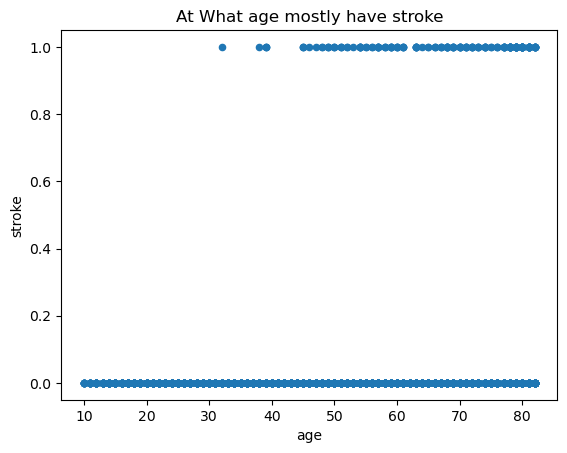

In [98]:
data.plot(kind='scatter', x='age', y='stroke', title='At What age mostly have stroke')

In [99]:
data2 = data.dropna()
data2

,Unnamed: 0,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,Male,67,0,1,228.69,36.6,1,True,False,False
1,2,Male,80,0,1,105.92,32.5,1,False,True,False
2,3,Female,49,0,0,171.23,34.4,1,False,False,True
3,4,Female,79,1,0,174.12,24.0,1,False,True,False
4,5,Male,81,0,0,186.21,29.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3421,5100,Male,82,1,0,71.97,28.3,0,False,True,False
3422,5102,Female,57,0,0,77.93,21.7,0,False,True,False
3423,5106,Female,81,0,0,125.20,40.0,0,False,True,False
3424,5107,Female,35,0,0,82.99,30.6,0,False,True,False


In [100]:
X = data2[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = data2['stroke']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [105]:
y_pred = model.predict(X_test)

In [106]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[642   0]
 [ 43   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       642
           1       1.00      0.02      0.04        44

    accuracy                           0.94       686
   macro avg       0.97      0.51      0.51       686
weighted avg       0.94      0.94      0.91       686

Accuracy Score: 0.9373177842565598


In [107]:
stroke_rates = data.groupby("gender")["stroke"].mean()

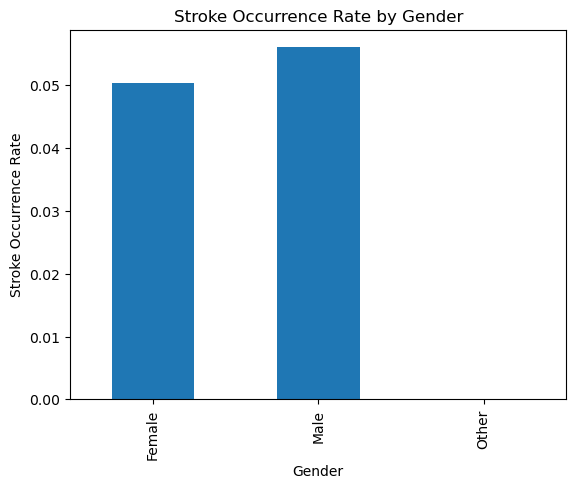

In [108]:
stroke_rates.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Stroke Occurrence Rate")
plt.title("Stroke Occurrence Rate by Gender")
plt.show()
